<a href="https://colab.research.google.com/github/mahii6991/DeepLearning_101/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#so we are creating a neural network to work with the image dataset
#so in this we were working with the image dataset
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

In [4]:
# Load the entire data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 11s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
#need to loop from the dataset of the pictures
for i in range(1000):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i][0]
    # Look up the class name from the class id
    image_class_name = cifar10_class_names[image_class_number]

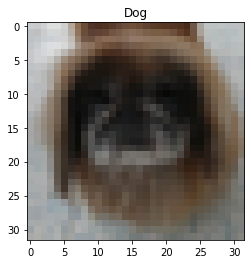

In [10]:
# Draw the image as a plot
plt.imshow(sample_image)
# Label the image
plt.title(image_class_name)
# Show the plot on the screen
plt.show()

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.utils import np_utils

In [11]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train =x_train / 255
x_test =x_test / 255


# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9.
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0.
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)


In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.layers.convolutional import Conv
from keras import activations
#now we will start to built our own neural network
#so we will be going to built it layer by layer
#we will be adding the 2D convolutionl neural network and try to built the 
model = Sequential()

#so here we will be adding the convolutional layer in our network
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(32,(3,3),activation="relu"))
#here we are adding the max-pooling layer/by keeping the large values and keeping the smaller one
model.add(MaxPooling2D(pool_size=(2,2)))
#now we will adding the dropout layer in it.
model.add(Dropout(0.25))

#here we are adding the layer with the 64 filters
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
#need to add the another max pooling layer here
model.add(MaxPooling2D(pool_size=(2,2)))
#now we will adding the dropout layer in it.
model.add(Dropout(0.25))


#now here we need to add the flatten layer in our dataset
model.add(Flatten())

#form here is the starting of the dense layer in our dataset
model.add(Dense(512,activation="relu"))
#now we will adding the dropout layer in it.
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [15]:
#compile the model of the neural network
#providing the loss , optimizer and the metric function in the dataset
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [16]:
#now we are feeding the dataset to the neural network to make the prediction
#so we are going to provide the training and the testing data to the network
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test,y_test),
    shuffle=True
)

Epoch 1/30
1563/1563 [==============================] - 32s 14ms/step - loss: 1.5567 - accuracy: 0.4308 - val_loss: 1.1909 - val_accuracy: 0.5748
Epoch 2/30
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1340 - accuracy: 0.5957 - val_loss: 0.9455 - val_accuracy: 0.6620
Epoch 3/30
1563/1563 [==============================] - 21s 14ms/step - loss: 0.9885 - accuracy: 0.6527 - val_loss: 0.8409 - val_accuracy: 0.7025
Epoch 4/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9009 - accuracy: 0.6835 - val_loss: 0.8113 - val_accuracy: 0.7205
Epoch 5/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8305 - accuracy: 0.7092 - val_loss: 0.7922 - val_accuracy: 0.7234
Epoch 6/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7840 - accuracy: 0.7258 - val_loss: 0.7180 - val_accuracy: 0.7508
Epoch 7/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7463 - accuracy: 0.7381 - val_loss: 0.7198 -

In [29]:
from google.colab import files
uploaded = files.upload()

Saving frog.png to frog.png
Saving model_structure.json to model_structure.json
Saving model_weights.h5 to model_weights.h5


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [28]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [31]:
# Load the json file that contains the model's structure
f = Path("model_structure.json")
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("model_weights.h5")

# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img = image.load_img("frog.png", target_size=(32, 32))

# Convert the image to a numpy array
image_to_test = image.img_to_array(img) /255


In [32]:
# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

# Make a prediction using the model
results = model.predict(list_of_images)

# Since we are only testing one image, we only need to check the first result
single_result = results[0]

# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Frog - Likelihood: 0.742258


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
